In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
df = pd.read_csv("POLITICAL_FAVORABLES_RCP_icod_20200317.csv")
df.head()

,SOURCE,SURVERYPERIOD,DATEFORMATTED,SAMPLE,FAVORABLE,UNFAVORABLE,MARGIN,CANDIDATE,DAYS_TO_GENERAL_ELECTION,ELECTION_YEAR,ELECTION_DATE
0,ABC/Wash Post,4/18 - 4/22,4/22/2012,1008 A,65,27,38,HRC,1661,2016,11/8/2016
1,ABC/Wash Post,11/28 - 12/2,12/2/2012,RV,65,31,34,HRC,1437,2016,11/8/2016
2,ABC/Wash Post,1/16 - 1/20,1/20/2013,RV,65,30,35,HRC,1388,2016,11/8/2016
3,ABC/Wash Post,6/19 - 6/23,6/23/2013,RV,60,36,24,HRC,1234,2016,11/8/2016
4,ABC/Wash Post,1/20 - 1/23,1/23/2014,873 RV,56,41,15,HRC,1020,2016,11/8/2016


In [395]:
df = df.drop(['SAMPLE','DATEFORMATTED','SURVERYPERIOD','ELECTION_DATE','UNFAVORABLE','MARGIN'],axis=1)
Hilary = df.loc[df['CANDIDATE'] == 'HRC']
Trump = df.loc[df['CANDIDATE'] == 'TRUMP']
Biden = df.loc[df['CANDIDATE'] == 'BIDEN']
Bernie = df.loc[df['CANDIDATE'] == 'BERNIE']

In [396]:
Trump20 = Trump.loc[Trump['ELECTION_YEAR']==2020]
Trump16 = Trump.loc[Trump['ELECTION_YEAR']==2016]
Bernie20 = Bernie.loc[Bernie['ELECTION_YEAR']==2020]
Bernie16= Bernie.loc[Bernie['ELECTION_YEAR']==2016]

In [397]:
Hilary = Hilary.drop(['CANDIDATE','ELECTION_YEAR',], axis=1)
Trump20 = Trump20.drop(['CANDIDATE','ELECTION_YEAR',], axis=1)
Trump16 = Trump16.drop(['CANDIDATE','ELECTION_YEAR',], axis=1)
Bernie20 = Bernie20.drop(['CANDIDATE','ELECTION_YEAR',], axis=1)
Bernie16 = Bernie16.drop(['CANDIDATE','ELECTION_YEAR',], axis=1)
Biden = Biden.drop(['CANDIDATE','ELECTION_YEAR',], axis=1)
print("done")

done


In [533]:
#Hilary polls
HFarLeft = Hilary.loc[(Hilary['SOURCE']=='CNN/Opinion Research')|(Hilary['SOURCE']=='CNN/ORC')]
HLeft= Hilary.loc[(Hilary['SOURCE']=='CNN')|(Hilary['SOURCE']=='NBC/WSJ')|(Hilary['SOURCE']=='CBS News/NY Times')|(Hilary['SOURCE']=='CBS News')|(Hilary['SOURCE']=='ABC/Wash Post')|(Hilary['SOURCE']=='Economist/YouGov')|(Hilary['SOURCE']=='The Atlantic/PRRI')]
HCenter = Hilary.loc[(Hilary['SOURCE']=='Associated Press/Gfk')|(Hilary['SOURCE']=='Bloomberg')|(Hilary['SOURCE']=='USA Today/Gallup')|(Hilary['SOURCE']=='USA Today/Suffolk')]
HRight = Hilary.loc[Hilary['SOURCE']=='FOX News']
#HFarRight = Hilary.loc[Hilary['SOURCE']==']
HIPolls = Hilary.loc[(Hilary['SOURCE']=='Gallup')|(Hilary['SOURCE']=='Gravis')|(Hilary['SOURCE']=='IDB/TIPP')|(Hilary['SOURCE']=='PPP (D)')|(Hilary['SOURCE']=='Pew Research')|(Hilary['SOURCE']=='Rasmussen Resports')|(Hilary['SOURCE']=='Reuters/Ipsos')]
HUPolls = Hilary.loc[(Hilary['SOURCE']=='McClatchy/Marist')|(Hilary['SOURCE']=='GWU/Battlegroud')|(Hilary['SOURCE']=='Monmouth')|(Hilary['SOURCE']=='Politico/GWU/Battleground')|(Hilary['SOURCE']=='Quinnipiac')]

def Clean_data(df1):
    
    df1 = df1.drop(['SOURCE','DAYS_TO_GENERAL_ELECTION'],axis=1)
    df1 = df1.reset_index(drop=True)
    
    return df1

HFarLeft = Clean_data(HFarLeft)
HFarLeft= HFarLeft.rename(columns={'FAVORABLE':'FarLeft'})
HLeft= Clean_data(HLeft)
HLeft= HLeft.rename(columns={'FAVORABLE':'Left'})
HCenter= Clean_data(HCenter)
HCenter= HCenter.rename(columns={'FAVORABLE':'Center'})
HRight = Clean_data(HRight)
HRight= HRight.rename(columns={'FAVORABLE':'Right'})
HIPolls= Clean_data(HIPolls)
HIPolls= HIPolls.rename(columns={'FAVORABLE':'Polls'})
HUPolls= Clean_data(HUPolls)
HUPolls= HUPolls.rename(columns={'FAVORABLE':'Uni Polls'})

'''
plt.plot(HFarLeft['DAYS_TO_GENERAL_ELECTION'],HFarLeft['FAVORABLE'], 'bd')
plt.plot(HLeft['DAYS_TO_GENERAL_ELECTION'],HLeft['FAVORABLE'], 'cd')
plt.plot(HCenter['DAYS_TO_GENERAL_ELECTION'],HCenter['FAVORABLE'],'md')
plt.plot(HRight['DAYS_TO_GENERAL_ELECTION'],HRight['FAVORABLE'],'rd')
plt.plot(HIPolls['DAYS_TO_GENERAL_ELECTION'],HIPolls['FAVORABLE'],'C1d')
plt.plot(HUPolls['DAYS_TO_GENERAL_ELECTION'],HUPolls['FAVORABLE'],'kd')
#plt.plot(NBC_H['DAYS_TO_GENERAL_ELECTION'],NBC_H['FAVORABLE'],'ro')
plt.legend()
'''


"\nplt.plot(HFarLeft['DAYS_TO_GENERAL_ELECTION'],HFarLeft['FAVORABLE'], 'bd')\nplt.plot(HLeft['DAYS_TO_GENERAL_ELECTION'],HLeft['FAVORABLE'], 'cd')\nplt.plot(HCenter['DAYS_TO_GENERAL_ELECTION'],HCenter['FAVORABLE'],'md')\nplt.plot(HRight['DAYS_TO_GENERAL_ELECTION'],HRight['FAVORABLE'],'rd')\nplt.plot(HIPolls['DAYS_TO_GENERAL_ELECTION'],HIPolls['FAVORABLE'],'C1d')\nplt.plot(HUPolls['DAYS_TO_GENERAL_ELECTION'],HUPolls['FAVORABLE'],'kd')\n#plt.plot(NBC_H['DAYS_TO_GENERAL_ELECTION'],NBC_H['FAVORABLE'],'ro')\nplt.legend()\n"

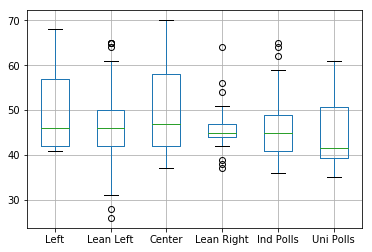

In [554]:
Hdata = [HFarLeft['FarLeft'],HLeft['Left'],HCenter['Center'],HRight['Right'],HIPolls['Polls'],HUPolls['Uni Polls']]

Hheaders = ['Left','Lean Left','Center','Lean Right','Ind Polls','Uni Polls',]

dfH = pd.concat(Hdata, axis=1, keys=Hheaders)

dfH.boxplot()

In [538]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(HFarLeft['FarLeft'],HLeft['Left'],HCenter['Center'],HRight['Right'],HIPolls['Polls'],HUPolls['Uni Polls'])
print(fvalue, pvalue)


2.851553823113297 0.015371885191054327


In [540]:
#Trump '16 polls
T16FarLeft = Trump16.loc[(Trump16['SOURCE']=='CNN/Opinion Research')|(Trump16['SOURCE']=='CNN/ORC')]
T16Left= Trump16.loc[(Trump16['SOURCE']=='NBC/WSJ')|(Trump16['SOURCE']=='ABC/Wash Post')|(Trump16['SOURCE']=='CBS News')|(Trump16['SOURCE']=='CBS News/NY Times')|(Trump16['SOURCE']=='Economist/YouGov')|(Trump16['SOURCE']=='The Atlantic/PRRI')]
T16Center = Trump16.loc[(Trump16['SOURCE']=='Associated Press/Gfk')|(Trump16['SOURCE']=='Bloomberg')|(Trump16['SOURCE']=='USA Today/Suffolk')]
T16Right = Trump16.loc[Trump16['SOURCE']=='FOX News']
#T16FarRight = Trump16.loc[Trump16['SOURCE']==']
T16IPolls = Trump16.loc[(Trump16['SOURCE']=='Gallup')|(Trump16['SOURCE']=='Gravis')|(Trump16['SOURCE']=='IDB/TIPP')|(Trump16['SOURCE']=='PPP (D)')|(Trump16['SOURCE']=='Rasmussen Resports')|(Trump16['SOURCE']=='Reuters/Ipsos')]
T16UPolls = Trump16.loc[(Trump16['SOURCE']=='McClatchy/Marist')|(Trump16['SOURCE']=='GWU/Battlegroud')|(Trump16['SOURCE']=='Monmouth')|(Trump16['SOURCE']=='Quinnipiac')]

T16FarLeft = Clean_data(T16FarLeft)
T16FarLeft= T16FarLeft.rename(columns={'FAVORABLE':'FarLeft'})
T16Left= Clean_data(T16Left)
T16Left= T16Left.rename(columns={'FAVORABLE':'Left'})
T16Center= Clean_data(T16Center)
T16Center= T16Center.rename(columns={'FAVORABLE':'Center'})
T16Right = Clean_data(T16Right)
T16Right= T16Right.rename(columns={'FAVORABLE':'Right'})
T16IPolls= Clean_data(T16IPolls)
T16IPolls= T16IPolls.rename(columns={'FAVORABLE':'Polls'})
T16UPolls= Clean_data(T16UPolls)
T16UPolls= T16UPolls.rename(columns={'FAVORABLE':'Uni Polls'})
'''
plt.plot(T16FarLeft['DAYS_TO_GENERAL_ELECTION'],T16FarLeft['FAVORABLE'], 'bd')
plt.plot(T16Left['DAYS_TO_GENERAL_ELECTION'],T16Left['FAVORABLE'], 'cd')
plt.plot(T16Center['DAYS_TO_GENERAL_ELECTION'],T16Center['FAVORABLE'],'md')
plt.plot(T16Right['DAYS_TO_GENERAL_ELECTION'],T16Right['FAVORABLE'],'rd')
plt.plot(T16IPolls['DAYS_TO_GENERAL_ELECTION'],T16IPolls['FAVORABLE'],'C1d')
plt.plot(T16UPolls['DAYS_TO_GENERAL_ELECTION'],T16UPolls['FAVORABLE'],'kd')
#plt.plot(NBC16['DAYS_TO_GENERAL_ELECTION'],NBC16['FAVORABLE'],'ro')
plt.legend()
'''


"\nplt.plot(T16FarLeft['DAYS_TO_GENERAL_ELECTION'],T16FarLeft['FAVORABLE'], 'bd')\nplt.plot(T16Left['DAYS_TO_GENERAL_ELECTION'],T16Left['FAVORABLE'], 'cd')\nplt.plot(T16Center['DAYS_TO_GENERAL_ELECTION'],T16Center['FAVORABLE'],'md')\nplt.plot(T16Right['DAYS_TO_GENERAL_ELECTION'],T16Right['FAVORABLE'],'rd')\nplt.plot(T16IPolls['DAYS_TO_GENERAL_ELECTION'],T16IPolls['FAVORABLE'],'C1d')\nplt.plot(T16UPolls['DAYS_TO_GENERAL_ELECTION'],T16UPolls['FAVORABLE'],'kd')\n#plt.plot(NBC16['DAYS_TO_GENERAL_ELECTION'],NBC16['FAVORABLE'],'ro')\nplt.legend()\n"

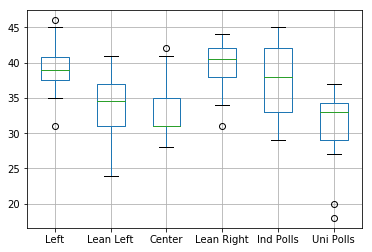

In [553]:
T16data = [T16FarLeft['FarLeft'],T16Left['Left'],T16Center['Center'],T16Right['Right'],T16IPolls['Polls'],T16UPolls['Uni Polls']]

T16headers = ['Left','Lean Left','Center','Lean Right','Ind Polls','Uni Polls',]

dfT16 = pd.concat(T16data, axis=1, keys=T16headers)

dfT16.boxplot()

In [531]:
#Trump '20 polls
T20FarLeft = Trump20.loc[(Trump20['SOURCE']=='CNN/Opinion Research')|(Trump20['SOURCE']=='CNN/ORC')]
T20Left= Trump20.loc[(Trump20['SOURCE']=='Politico/Morning Consult')|(Trump20['SOURCE']=='NBC/WSJ')|(Trump20['SOURCE']=='ABC/Wash Post')|(Trump20['SOURCE']=='CBS News')|(Trump20['SOURCE']=='CBS News/NY Times')|(Trump20['SOURCE']=='Economist/YouGov')|(Trump20['SOURCE']=='The Atlantic/PRRI')]
T20Center = Trump20.loc[(Trump20['SOURCE']=='Associated Press/Gfk')|(Trump20['SOURCE']=='Bloomberg')|(Trump20['SOURCE']=='USA Today/Suffolk')]
T20Right = Trump20.loc[Trump20['SOURCE']=='FOX News']
#T20FarRight = Trump16.loc[Trump16['SOURCE']==']
T20IPolls = Trump20.loc[(Trump20['SOURCE']=='Gallup')|(Trump20['SOURCE']=='Gravis')|(Trump20['SOURCE']=='IDB/TIPP')|(Trump20['SOURCE']=='PPP (D)')|(Trump20['SOURCE']=='Rasmussen Resports')|(Trump20['SOURCE']=='Reuters/Ipsos')]
T20UPolls = Trump20.loc[(Trump20['SOURCE']=='Grinell/Selzer')|(Trump20['SOURCE']=='McClatchy/Marist')|(Trump20['SOURCE']=='GWU/Battlegroud')|(Trump20['SOURCE']=='Harvard-Harris')|(Trump20['SOURCE']=='GU Politics/Battleground')|(Trump20['SOURCE']=='Monmouth')|(Trump20['SOURCE']=='Quinnipiac')]

T20FarLeft = Clean_data(T20FarLeft)
T20FarLeft= T20FarLeft.rename(columns={'FAVORABLE':'FarLeft'})
T20Left= Clean_data(T20Left)
T20Left= T20Left.rename(columns={'FAVORABLE':'Left'})
T20Center= Clean_data(T20Center)
T20Center= T20Center.rename(columns={'FAVORABLE':'Center'})
T20Right = Clean_data(T20Right)
T20Right= T20Right.rename(columns={'FAVORABLE':'Right'})
T20IPolls= Clean_data(T20IPolls)
T20IPolls= T20IPolls.rename(columns={'FAVORABLE':'Polls'})
T20UPolls= Clean_data(T20UPolls)
T20UPolls= T20UPolls.rename(columns={'FAVORABLE':'Uni Polls'})

'''
plt.plot(T20FarLeft['DAYS_TO_GENERAL_ELECTION'],T20FarLeft['FAVORABLE'], 'bd')
plt.plot(T20Left['DAYS_TO_GENERAL_ELECTION'],T20Left['FAVORABLE'], 'cd')
plt.plot(T20Center['DAYS_TO_GENERAL_ELECTION'],T20Center['FAVORABLE'],'md')
plt.plot(T20Right['DAYS_TO_GENERAL_ELECTION'],T20Right['FAVORABLE'],'rd')
plt.plot(T20IPolls['DAYS_TO_GENERAL_ELECTION'],T20IPolls['FAVORABLE'],'C1d')
plt.plot(T20UPolls['DAYS_TO_GENERAL_ELECTION'],T20UPolls['FAVORABLE'],'kd')
plt.legend()
'''

"\nplt.plot(T20FarLeft['DAYS_TO_GENERAL_ELECTION'],T20FarLeft['FAVORABLE'], 'bd')\nplt.plot(T20Left['DAYS_TO_GENERAL_ELECTION'],T20Left['FAVORABLE'], 'cd')\nplt.plot(T20Center['DAYS_TO_GENERAL_ELECTION'],T20Center['FAVORABLE'],'md')\nplt.plot(T20Right['DAYS_TO_GENERAL_ELECTION'],T20Right['FAVORABLE'],'rd')\nplt.plot(T20IPolls['DAYS_TO_GENERAL_ELECTION'],T20IPolls['FAVORABLE'],'C1d')\nplt.plot(T20UPolls['DAYS_TO_GENERAL_ELECTION'],T20UPolls['FAVORABLE'],'kd')\nplt.legend()\n"

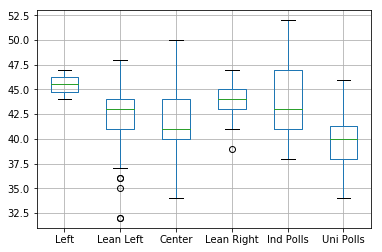

In [552]:
T20data = [T20FarLeft['FarLeft'],T20Left['Left'],T20Center['Center'],T20Right['Right'],T20IPolls['Polls'],T20UPolls['Uni Polls']]

T20headers = ['Left','Lean Left','Center','Lean Right','Ind Polls','Uni Polls',]

dfT20 = pd.concat(T20data, axis=1, keys=T20headers)

dfT20.boxplot()

In [486]:
#Biden'20 polls
#BFarLeft
BLeft= Biden.loc[(Biden['SOURCE']=='NBC/WSJ')|(Biden['SOURCE']=='Economist/YouGov')|(Biden['SOURCE']=='CNN')|(Biden['SOURCE']=='NPR/PBS/Marist')|(Biden['SOURCE']=='Politico/Morning Consult')]
#BCenter = Biden.loc[(Biden
BRight = Biden.loc[Biden['SOURCE']=='FOX News']
#BFarRight = Biden.loc[Biden['SOURCE']==']
#BIPolls = 
BUPolls = Biden.loc[(Biden['SOURCE']=='GU Politics/Battlegroud')|(Biden['SOURCE']=='Monmouth')|(Biden['SOURCE']=='Quinnipiac')|(Biden['SOURCE']=='Grinnell/Selzer')|(Biden['SOURCE']=='Harvard-Harris')]

BLeft= Clean_data(BLeft)
BLeft= BLeft.rename(columns={'FAVORABLE':'BLeft'})
BRight = Clean_data(BRight)
BRight= BRight.rename(columns={'FAVORABLE':'BRight'})
BUPolls= Clean_data(BUPolls)
BUPolls= BUPolls.rename(columns={'FAVORABLE':'BUPolls'})

'''
#plt.plot(BFarLeft['DAYS_TO_GENERAL_ELECTION'],BFarLeft['FAVORABLE'], 'bd')
plt.plot(BLeft['DAYS_TO_GENERAL_ELECTION'],BLeft['FAVORABLE'], 'cd')
#plt.plot(BCenter['DAYS_TO_GENERAL_ELECTION'],BCenter['FAVORABLE'],'md')
plt.plot(BRight['DAYS_TO_GENERAL_ELECTION'],BRight['FAVORABLE'],'rd')
#plt.plot(BIPolls['DAYS_TO_GENERAL_ELECTION'],BIPolls['FAVORABLE'],'C1d')
plt.plot(BUPolls['DAYS_TO_GENERAL_ELECTION'],BUPolls['FAVORABLE'],'kd')
plt.legend()
print(BLeft)
'''

"\n#plt.plot(BFarLeft['DAYS_TO_GENERAL_ELECTION'],BFarLeft['FAVORABLE'], 'bd')\nplt.plot(BLeft['DAYS_TO_GENERAL_ELECTION'],BLeft['FAVORABLE'], 'cd')\n#plt.plot(BCenter['DAYS_TO_GENERAL_ELECTION'],BCenter['FAVORABLE'],'md')\nplt.plot(BRight['DAYS_TO_GENERAL_ELECTION'],BRight['FAVORABLE'],'rd')\n#plt.plot(BIPolls['DAYS_TO_GENERAL_ELECTION'],BIPolls['FAVORABLE'],'C1d')\nplt.plot(BUPolls['DAYS_TO_GENERAL_ELECTION'],BUPolls['FAVORABLE'],'kd')\nplt.legend()\nprint(BLeft)\n"

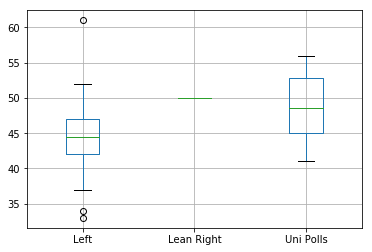

In [550]:
Bdata = [BLeft['BLeft'],BRight['BRight'],BUPolls['BUPolls']]

Bheaders = ['Left','Lean Right','Uni Polls',]

dfB = pd.concat(Bdata, axis=1, keys=Bheaders)

dfB.boxplot()

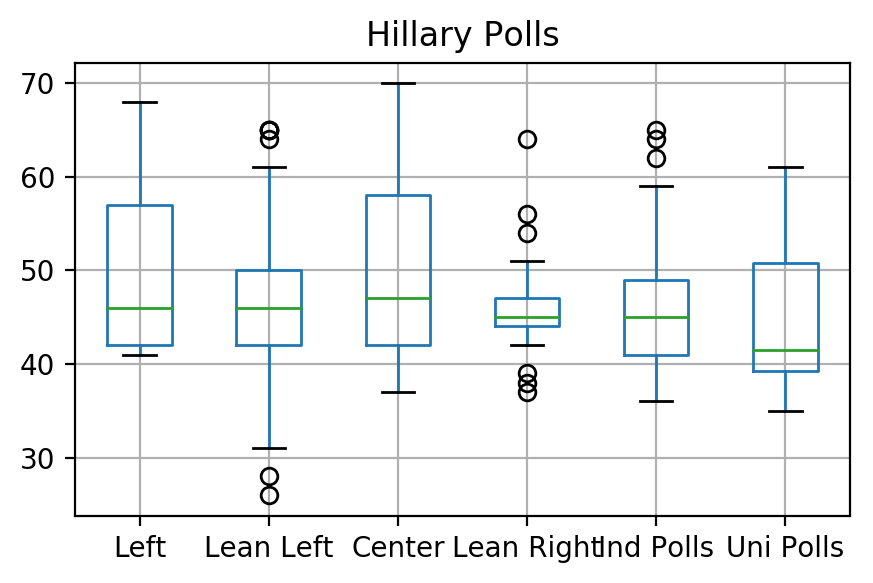

In [555]:
fig, ax = plt.subplots(figsize=(5,3),dpi=200)
plt.title("Hillary Polls")
dfH.boxplot()

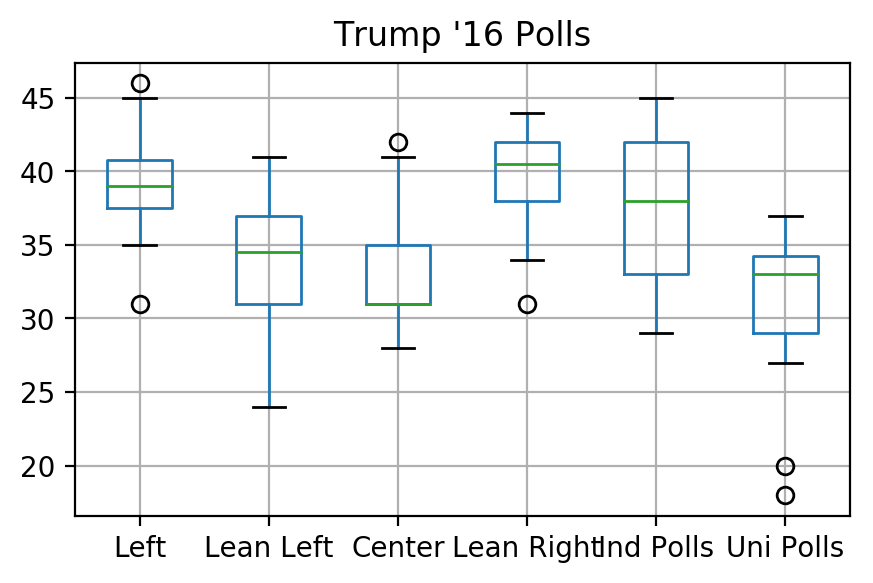

In [556]:
fig, ax = plt.subplots(figsize=(5,3),dpi=200)
plt.title("Trump '16 Polls")
dfT16.boxplot()

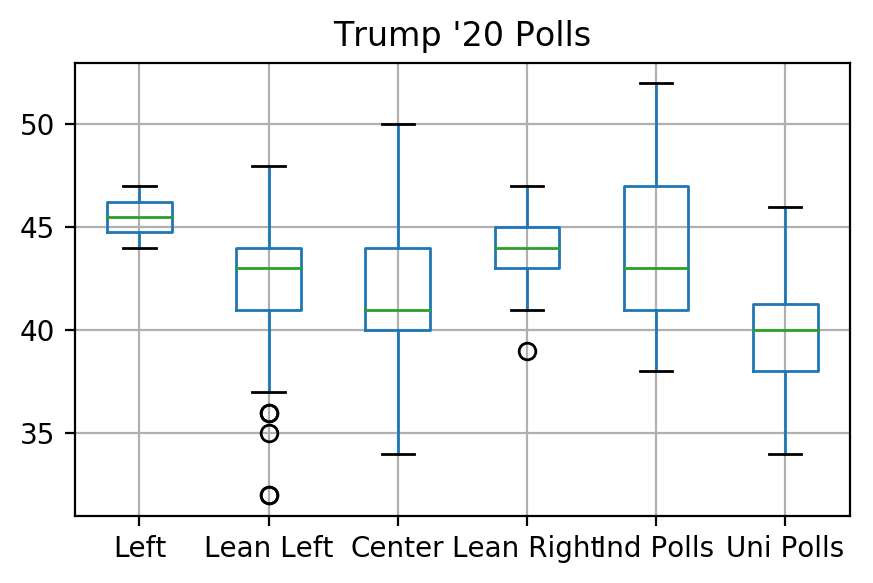

In [557]:
fig, ax = plt.subplots(figsize=(5,3),dpi=200)
plt.title("Trump '20 Polls")
dfT20.boxplot()

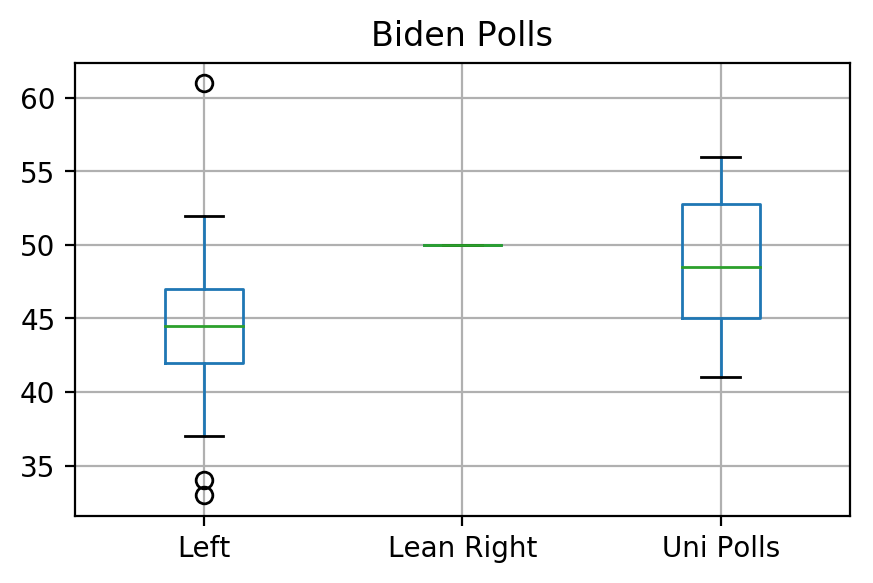

In [558]:
fig, ax = plt.subplots(figsize=(5,3),dpi=200)
plt.title("Biden Polls")
dfB.boxplot()